In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import opendatasets as od
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-08-20 18:45:49.746007: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-20 18:45:49.799086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 18:45:49.828647: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 18:45:49.834970: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 18:45:49.870321: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.17.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1724159752.188065  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159752.321669  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159752.321743  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
# # Assign the Kaggle data set URL into variable
# dataset = 'https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition'
# # Using opendatasets let's download the data sets
# od.download(dataset)

In [4]:
path = os.path.normpath(os.path.join(os.getcwd(),"fruit-and-vegetable-image-recognition"))
path
# os.listdir(path)

'/mnt/d/Projects/Fruit_n_Vegetable_Detector/backend/fruit-and-vegetable-image-recognition'

In [5]:
train_dir  = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
validation_dir = os.path.join(path, 'validation')

BATCH_SIZE = 16
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3115 files belonging to 36 classes.


I0000 00:00:1724159754.196422  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159754.196508  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159754.196536  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159755.204407  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724159755.204475  152308 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-20

In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                              shuffle=True,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMG_SIZE)

Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


2024-08-20 18:45:57.308670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:45:57.454754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:45:57.496239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:45:57.831090: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


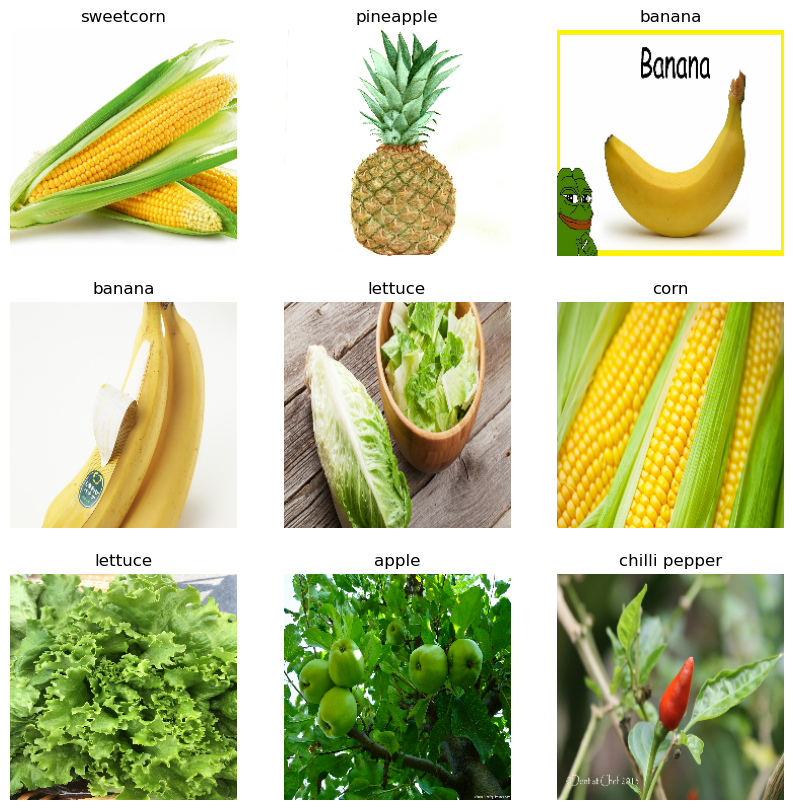

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.RandomRotation(0.2),
])

2024-08-20 18:45:58.365375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:45:59.545003: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


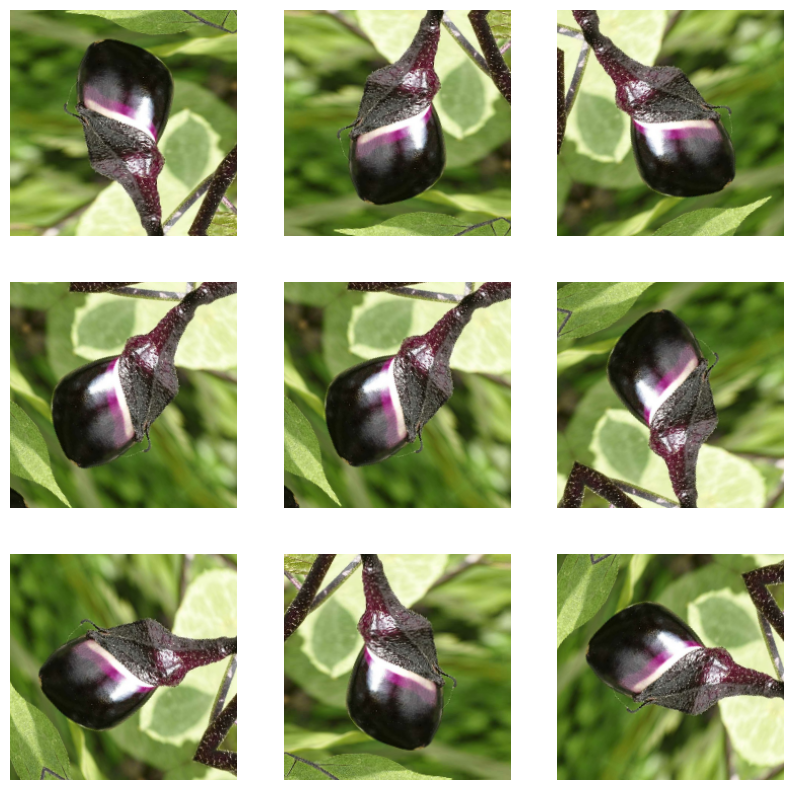

In [10]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [11]:
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

In [12]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SHAPE,
)

In [13]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)

2024-08-20 18:46:02.723196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:03.031177: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1724159763.101669  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.122174  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.125009  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.129053  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.131278  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.168648  152308 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159763.171363  152308 gpu_timer

In [14]:
print(feature_batch.shape)

(16, 7, 7, 2048)


In [15]:
base_model.trainable = False

In [16]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "resnet152v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 58,331,648 (222.52 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,331,648 (222.52 MB)

In [17]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 2048)


In [18]:
num_classes = len(class_names)

prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 36)


In [19]:
IMG_SHAPE

(224, 224, 3)

In [20]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │        73,764 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,405,412 (222.80 MB)

 Trainable params: 73,764 (288.14 KB)

 Non-trainable params: 58,331,648 (222.52 MB)

In [22]:
len(model.trainable_variables)

2

In [23]:
# tf.keras.utils.plot_model(model, show_shapes=True)

In [24]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
initial_epochs = 20

loss0, accuracy0 = model.evaluate(validation_dataset)

11/22 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.0095 - loss: 4.7324

2024-08-20 18:46:14.387772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:14.545350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0157 - loss: 4.6321

W0000 00:00:1724159775.429564  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.432025  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.434486  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.437967  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.440711  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.447118  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.450102  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.453278  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.456502  152485 gp

22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.0163 - loss: 4.6210


W0000 00:00:1724159775.836769  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.838032  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.839168  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.840340  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.841515  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.842757  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.843924  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.845098  152485 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724159775.846383  152485 gp

In [26]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 4.51
initial accuracy: 0.02


In [27]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,verbose=2)

Epoch 1/20


2024-08-20 18:46:27.224546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:27.269767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:27.561853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:28.730275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:29.189739: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:29.351456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:29.628407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:29.724447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:29.897038: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 32s - 163ms/step - accuracy: 0.0986 - loss: 3.6802 - val_accuracy: 0.3447 - val_loss: 2.5214
Epoch 2/20


2024-08-20 18:46:48.096096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:48.239348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:48.405923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:48.456124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:48.717245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:49.329596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:49.384273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:50.358440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:46:50.528537: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.3117 - loss: 2.5443 - val_accuracy: 0.6211 - val_loss: 1.6180
Epoch 3/20


2024-08-20 18:47:07.459961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:07.506020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:07.658769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:08.234879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:08.638508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:09.049624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:09.110474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:10.004124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:10.082738: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 99ms/step - accuracy: 0.4706 - loss: 1.9172 - val_accuracy: 0.7179 - val_loss: 1.1933
Epoch 4/20


2024-08-20 18:47:26.713408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:26.784729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:26.933913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:27.075143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:27.455606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:27.618597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:27.662720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:28.120742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:28.459394: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.5766 - loss: 1.5604 - val_accuracy: 0.7521 - val_loss: 0.9645
Epoch 5/20


2024-08-20 18:47:46.276979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:46.300722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:46.515030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:46.975817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:47.377142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:47.462706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:48.173162: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:48.361982: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:47:48.512908: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.6148 - loss: 1.3699 - val_accuracy: 0.7892 - val_loss: 0.8216
Epoch 6/20


2024-08-20 18:48:05.619832: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:05.664794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:05.845188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:05.999052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:06.531924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:06.716697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:07.078462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:07.096318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:08.318124: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 100ms/step - accuracy: 0.6510 - loss: 1.2384 - val_accuracy: 0.8205 - val_loss: 0.7193
Epoch 7/20


2024-08-20 18:48:25.150027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:25.176431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:25.558693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:25.830717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:25.993531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:26.930937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:27.074522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:27.074791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:27.266286: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 99ms/step - accuracy: 0.6828 - loss: 1.1316 - val_accuracy: 0.8348 - val_loss: 0.6445
Epoch 8/20


2024-08-20 18:48:44.500673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:44.745201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:44.793611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:44.927113: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:45.299069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:45.356340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:45.707691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:45.794363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:48:46.153482: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 101ms/step - accuracy: 0.7085 - loss: 1.0251 - val_accuracy: 0.8490 - val_loss: 0.5840
Epoch 9/20


2024-08-20 18:49:04.302602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:04.415928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:04.444080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:04.935761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:05.374928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:05.425690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:05.477174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:05.633921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:06.422797: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 100ms/step - accuracy: 0.7175 - loss: 0.9837 - val_accuracy: 0.8604 - val_loss: 0.5419
Epoch 10/20


2024-08-20 18:49:23.779385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:23.869380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:23.893011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.237647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.474496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.501295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.506437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.601895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:24.796540: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 99ms/step - accuracy: 0.7242 - loss: 0.9126 - val_accuracy: 0.8632 - val_loss: 0.5065
Epoch 11/20


2024-08-20 18:49:43.257870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:43.284844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:43.566468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:43.655322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:44.082575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:44.424890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:44.961079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:45.053404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:49:45.684672: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 101ms/step - accuracy: 0.7496 - loss: 0.8755 - val_accuracy: 0.8746 - val_loss: 0.4800
Epoch 12/20


2024-08-20 18:50:02.844594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:03.001722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:03.048297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:03.175268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:04.003803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:05.049924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:05.055220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:05.174510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:05.306761: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 99ms/step - accuracy: 0.7570 - loss: 0.8388 - val_accuracy: 0.8661 - val_loss: 0.4560
Epoch 13/20


2024-08-20 18:50:22.168420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:22.342641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:22.430740: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:22.495544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:22.951165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:23.017874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:23.117012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:23.475659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:23.851915: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.7596 - loss: 0.8113 - val_accuracy: 0.8689 - val_loss: 0.4344
Epoch 14/20


2024-08-20 18:50:41.659733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:41.687047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:41.942649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:42.910752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:42.944504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:43.609250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:43.707119: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:43.787675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:50:43.913701: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.7753 - loss: 0.7673 - val_accuracy: 0.8889 - val_loss: 0.4198
Epoch 15/20


2024-08-20 18:51:01.143597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:01.200456: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:01.244069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:01.380598: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:02.218282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:02.389084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:03.033837: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:03.210248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:03.680440: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 100ms/step - accuracy: 0.7907 - loss: 0.7263 - val_accuracy: 0.8860 - val_loss: 0.4038
Epoch 16/20


2024-08-20 18:51:20.628886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:20.801768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:20.877363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:21.094560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:21.372104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:21.446266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:21.934316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:22.084276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:22.950847: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.7820 - loss: 0.7311 - val_accuracy: 0.8917 - val_loss: 0.3874
Epoch 17/20


2024-08-20 18:51:40.004406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.396774: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.445943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.591536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.707496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.725763: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.867361: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:40.958406: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:41.654581: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 100ms/step - accuracy: 0.8026 - loss: 0.6794 - val_accuracy: 0.9060 - val_loss: 0.3735
Epoch 18/20


2024-08-20 18:51:59.637289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:59.696385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:51:59.907561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:00.375843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:00.561358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:01.170846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:01.186316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:01.260252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:01.462231: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 20s - 102ms/step - accuracy: 0.8042 - loss: 0.6702 - val_accuracy: 0.9145 - val_loss: 0.3633
Epoch 19/20


2024-08-20 18:52:19.489165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:19.759678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.243224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.243514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.317183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.342811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.347638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.368665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:20.563619: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 100ms/step - accuracy: 0.8058 - loss: 0.6403 - val_accuracy: 0.9088 - val_loss: 0.3534
Epoch 20/20


2024-08-20 18:52:39.030384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:39.371919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:39.385537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:39.584827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:39.756378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:40.499176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:40.591620: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:40.854471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:52:41.029661: W tensorflow/core/lib/png/png_io.cc:89] PNG 

195/195 - 19s - 99ms/step - accuracy: 0.8022 - loss: 0.6337 - val_accuracy: 0.9174 - val_loss: 0.3462


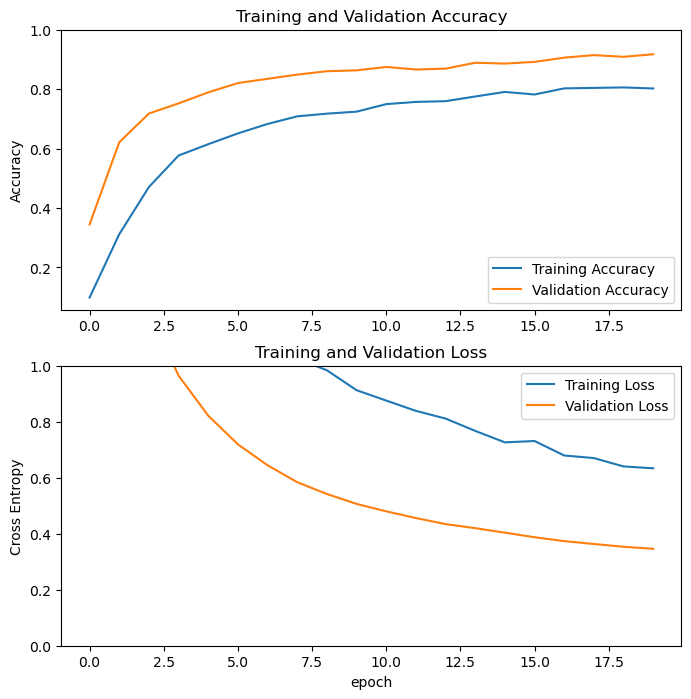

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# fine tuning

In [29]:
base_model.trainable = True

In [30]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 450

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  564


In [31]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │        73,764 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,405,412 (222.80 MB)

 Trainable params: 22,872,100 (87.25 MB)

 Non-trainable params: 35,533,312 (135.55 MB)

In [33]:
len(model.trainable_variables)

106

In [34]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset)

Epoch 21/40


2024-08-20 18:53:32.886230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:33.056149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:33.142172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:33.193303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
W0000 00:00:1724160214.715246  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160214.756337  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160214.775032  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160214.794409  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160214.824236  152484 gpu_timer.cc:114] 

  1/195 ━━━━━━━━━━━━━━━━━━━━ 2:03:54 38s/step - accuracy: 0.8125 - loss: 1.0372

W0000 00:00:1724160219.456056  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160219.457424  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160219.458902  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160219.460558  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160219.462189  152484 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


  5/195 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.7446 - loss: 1.0232

2024-08-20 18:53:40.033340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 31s 167ms/step - accuracy: 0.7353 - loss: 1.0442

2024-08-20 18:53:40.533351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:40.707796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.7324 - loss: 1.0587

2024-08-20 18:53:43.059806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:43.101069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/195 ━━━━━━━━━━━━━━━━━━━━ 28s 170ms/step - accuracy: 0.7211 - loss: 1.0841

2024-08-20 18:53:44.154943: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 27s 170ms/step - accuracy: 0.7187 - loss: 1.0905

2024-08-20 18:53:44.459528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 36/195 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.7140 - loss: 1.1057

2024-08-20 18:53:45.379118: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/195 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.7077 - loss: 1.1264

2024-08-20 18:53:47.240132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 62/195 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.7036 - loss: 1.1403

2024-08-20 18:53:49.837473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:53:49.981979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 85/195 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - accuracy: 0.7050 - loss: 1.1405

2024-08-20 18:53:54.023190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/195 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.7062 - loss: 1.1384

2024-08-20 18:53:56.564144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


109/195 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.7067 - loss: 1.1371

2024-08-20 18:53:58.182805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/195 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.7072 - loss: 1.1348

2024-08-20 18:54:00.159454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


128/195 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.7074 - loss: 1.1332

2024-08-20 18:54:01.340101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/195 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.7077 - loss: 1.1314

2024-08-20 18:54:02.521244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/195 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.7079 - loss: 1.1303

2024-08-20 18:54:03.269791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/195 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7091 - loss: 1.1237

2024-08-20 18:54:07.205111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


194/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7112 - loss: 1.1147

W0000 00:00:1724160252.477041  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.478432  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.479744  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.481085  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.482596  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.484080  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.485843  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.487634  152481 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160252.489384  152481 gp

195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.7113 - loss: 1.1144

2024-08-20 18:54:18.495967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:18.720964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 210ms/step - accuracy: 0.7114 - loss: 1.1141 - val_accuracy: 0.9060 - val_loss: 0.3443
Epoch 22/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 51s 265ms/step - accuracy: 1.0000 - loss: 0.4070

2024-08-20 18:54:20.442973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 37s 194ms/step - accuracy: 0.8924 - loss: 0.5904

2024-08-20 18:54:20.794529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:20.844206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 35s 186ms/step - accuracy: 0.8517 - loss: 0.6671

2024-08-20 18:54:21.119684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/195 ━━━━━━━━━━━━━━━━━━━━ 33s 180ms/step - accuracy: 0.8432 - loss: 0.6737

2024-08-20 18:54:21.510360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/195 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - accuracy: 0.8289 - loss: 0.6968

2024-08-20 18:54:22.190198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/195 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.8218 - loss: 0.7100

2024-08-20 18:54:22.603068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/195 ━━━━━━━━━━━━━━━━━━━━ 30s 174ms/step - accuracy: 0.8041 - loss: 0.7442

2024-08-20 18:54:23.589720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/195 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.7963 - loss: 0.7713

2024-08-20 18:54:24.789433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/195 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.7949 - loss: 0.7773

2024-08-20 18:54:25.163657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:25.302771: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/195 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.7922 - loss: 0.7859

2024-08-20 18:54:25.820009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/195 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.7865 - loss: 0.8038

2024-08-20 18:54:28.573787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/195 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.7839 - loss: 0.8121

2024-08-20 18:54:30.032628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/195 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.7806 - loss: 0.8218

2024-08-20 18:54:33.068550: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/195 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.7803 - loss: 0.8227

2024-08-20 18:54:33.826030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/195 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.7794 - loss: 0.8251

2024-08-20 18:54:37.201449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


109/195 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.7794 - loss: 0.8253

2024-08-20 18:54:38.877192: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/195 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7792 - loss: 0.8259

2024-08-20 18:54:42.457088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.7790 - loss: 0.8260

2024-08-20 18:54:43.120065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/195 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.7787 - loss: 0.8265

2024-08-20 18:54:44.139053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/195 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.7783 - loss: 0.8270

2024-08-20 18:54:45.196718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/195 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.7776 - loss: 0.8281

2024-08-20 18:54:48.400887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7769 - loss: 0.8287

2024-08-20 18:54:53.598583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:53.902597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.7769 - loss: 0.8287 - val_accuracy: 0.9231 - val_loss: 0.3065
Epoch 23/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - accuracy: 0.7500 - loss: 0.7788

2024-08-20 18:54:56.020846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  2/195 ━━━━━━━━━━━━━━━━━━━━ 32s 171ms/step - accuracy: 0.7344 - loss: 0.7527

2024-08-20 18:54:56.284930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:56.285569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  4/195 ━━━━━━━━━━━━━━━━━━━━ 34s 180ms/step - accuracy: 0.7513 - loss: 0.6989

2024-08-20 18:54:56.716646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:56.915369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 32s 175ms/step - accuracy: 0.7862 - loss: 0.6558

2024-08-20 18:54:57.998068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:58.159497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:58.160681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/195 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.7916 - loss: 0.6625

2024-08-20 18:54:58.853554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/195 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.7901 - loss: 0.6737

2024-08-20 18:54:59.333931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:54:59.337240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/195 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.7882 - loss: 0.7010

2024-08-20 18:55:01.428534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 61/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.7930 - loss: 0.7054

2024-08-20 18:55:06.368897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 66/195 ━━━━━━━━━━━━━━━━━━━━ 22s 172ms/step - accuracy: 0.7937 - loss: 0.7053

2024-08-20 18:55:07.242610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 87/195 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.7953 - loss: 0.7066

2024-08-20 18:55:10.820251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/195 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.7960 - loss: 0.7067

2024-08-20 18:55:12.856354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.7964 - loss: 0.7066

2024-08-20 18:55:13.761063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


107/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.7967 - loss: 0.7065

2024-08-20 18:55:14.269425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/195 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7987 - loss: 0.7063

2024-08-20 18:55:17.949080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.7989 - loss: 0.7062

2024-08-20 18:55:18.281399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:18.283581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/195 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.7995 - loss: 0.7061

2024-08-20 18:55:19.999933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/195 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.8008 - loss: 0.7051

2024-08-20 18:55:24.511404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8016 - loss: 0.7048

2024-08-20 18:55:29.433000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:29.877364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.8016 - loss: 0.7048 - val_accuracy: 0.9202 - val_loss: 0.2779
Epoch 24/40


2024-08-20 18:55:31.914766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:32.061172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 34s 182ms/step - accuracy: 0.8403 - loss: 0.7046

2024-08-20 18:55:32.353402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:32.379129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/195 ━━━━━━━━━━━━━━━━━━━━ 33s 179ms/step - accuracy: 0.8518 - loss: 0.6473

2024-08-20 18:55:33.089895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.8521 - loss: 0.6392

2024-08-20 18:55:33.431903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.8523 - loss: 0.6270

2024-08-20 18:55:33.958266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/195 ━━━━━━━━━━━━━━━━━━━━ 31s 175ms/step - accuracy: 0.8502 - loss: 0.6243

2024-08-20 18:55:34.302780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:34.344725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/195 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.8408 - loss: 0.6353

2024-08-20 18:55:35.546626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:55:35.546856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/195 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.8342 - loss: 0.6497

2024-08-20 18:55:36.953675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 48/195 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.8266 - loss: 0.6623

2024-08-20 18:55:40.238633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/195 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.8266 - loss: 0.6613

2024-08-20 18:55:41.215115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/195 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.8261 - loss: 0.6609

2024-08-20 18:55:43.592792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/195 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.8265 - loss: 0.6599

2024-08-20 18:55:44.700856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/195 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.8258 - loss: 0.6592

2024-08-20 18:55:49.384501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.8257 - loss: 0.6591

2024-08-20 18:55:49.842715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/195 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.8254 - loss: 0.6585

2024-08-20 18:55:52.055404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/195 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.8249 - loss: 0.6582

2024-08-20 18:55:54.136496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/195 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.8249 - loss: 0.6581

2024-08-20 18:55:54.483033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


148/195 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.8240 - loss: 0.6583

2024-08-20 18:55:57.378577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/195 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8229 - loss: 0.6586

2024-08-20 18:56:01.043676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8218 - loss: 0.6587

2024-08-20 18:56:05.432945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:05.801191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.8218 - loss: 0.6587 - val_accuracy: 0.9402 - val_loss: 0.2579
Epoch 25/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 56s 292ms/step - accuracy: 0.9375 - loss: 0.4759

2024-08-20 18:56:08.056856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:08.220553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  4/195 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.8906 - loss: 0.4926

2024-08-20 18:56:08.612737: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:08.637938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.8875 - loss: 0.4897

2024-08-20 18:56:08.822834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:08.921894: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.8791 - loss: 0.4907

2024-08-20 18:56:09.312538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.8812 - loss: 0.4916

2024-08-20 18:56:10.498209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/195 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.8808 - loss: 0.4913

2024-08-20 18:56:11.353180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.8794 - loss: 0.4954

2024-08-20 18:56:11.851166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/195 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.8780 - loss: 0.4999

2024-08-20 18:56:12.545349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/195 ━━━━━━━━━━━━━━━━━━━━ 27s 172ms/step - accuracy: 0.8746 - loss: 0.5071

2024-08-20 18:56:13.775853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/195 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.8723 - loss: 0.5131

2024-08-20 18:56:14.632095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.8646 - loss: 0.5305

2024-08-20 18:56:17.680153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 59/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.8640 - loss: 0.5315

2024-08-20 18:56:18.040813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 77/195 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.8597 - loss: 0.5406

2024-08-20 18:56:21.038160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 93/195 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.8563 - loss: 0.5460

2024-08-20 18:56:23.815884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/195 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8552 - loss: 0.5474

2024-08-20 18:56:24.624190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


123/195 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.8511 - loss: 0.5525

2024-08-20 18:56:28.869936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/195 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.8485 - loss: 0.5555

2024-08-20 18:56:31.737661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/195 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.8476 - loss: 0.5566

2024-08-20 18:56:32.931261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/195 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8460 - loss: 0.5585

2024-08-20 18:56:35.865131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


167/195 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.8457 - loss: 0.5587

2024-08-20 18:56:36.396695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8433 - loss: 0.5622

2024-08-20 18:56:41.669790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:41.766332: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.8432 - loss: 0.5623 - val_accuracy: 0.9402 - val_loss: 0.2411
Epoch 26/40


2024-08-20 18:56:43.241288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:43.391536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  1/195 ━━━━━━━━━━━━━━━━━━━━ 1:31 471ms/step - accuracy: 0.9375 - loss: 0.3426

2024-08-20 18:56:43.575585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9072 - loss: 0.4250

2024-08-20 18:56:44.777529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:44.925670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/195 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.9018 - loss: 0.4420

2024-08-20 18:56:45.302578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 33s 181ms/step - accuracy: 0.9004 - loss: 0.4467

2024-08-20 18:56:45.537255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.8974 - loss: 0.4580

2024-08-20 18:56:46.023032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:56:46.026564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/195 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.8972 - loss: 0.4624

2024-08-20 18:56:46.697814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/195 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - accuracy: 0.8885 - loss: 0.4888

2024-08-20 18:56:49.126880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 38/195 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.8851 - loss: 0.4959

2024-08-20 18:56:49.966426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/195 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.8838 - loss: 0.4984

2024-08-20 18:56:50.525490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 69/195 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8734 - loss: 0.5089

2024-08-20 18:56:55.267219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 72/195 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8725 - loss: 0.5096

2024-08-20 18:56:55.807627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/195 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.8685 - loss: 0.5143

2024-08-20 18:56:58.501567: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/195 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.8660 - loss: 0.5173

2024-08-20 18:57:00.884115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/195 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.8655 - loss: 0.5178

2024-08-20 18:57:01.431199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


121/195 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.8637 - loss: 0.5198

2024-08-20 18:57:04.081852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.8628 - loss: 0.5207

2024-08-20 18:57:06.272319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/195 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8623 - loss: 0.5211

2024-08-20 18:57:07.353920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


157/195 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.8611 - loss: 0.5226

2024-08-20 18:57:10.222289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


165/195 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.8607 - loss: 0.5231

2024-08-20 18:57:11.581491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8588 - loss: 0.5262

2024-08-20 18:57:16.894626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:17.507143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.8588 - loss: 0.5263 - val_accuracy: 0.9459 - val_loss: 0.2247
Epoch 27/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.8750 - loss: 0.4735

2024-08-20 18:57:19.159108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:19.175438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:19.299918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - accuracy: 0.8403 - loss: 0.5045

2024-08-20 18:57:19.631520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/195 ━━━━━━━━━━━━━━━━━━━━ 36s 195ms/step - accuracy: 0.8387 - loss: 0.5009

2024-08-20 18:57:20.274446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.8379 - loss: 0.5115

2024-08-20 18:57:20.565641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/195 ━━━━━━━━━━━━━━━━━━━━ 32s 181ms/step - accuracy: 0.8376 - loss: 0.5147

2024-08-20 18:57:21.410223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:21.411226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:21.419094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/195 ━━━━━━━━━━━━━━━━━━━━ 31s 180ms/step - accuracy: 0.8382 - loss: 0.5145

2024-08-20 18:57:21.931225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/195 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.8385 - loss: 0.5148

2024-08-20 18:57:22.270887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/195 ━━━━━━━━━━━━━━━━━━━━ 28s 175ms/step - accuracy: 0.8398 - loss: 0.5145

2024-08-20 18:57:24.180787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 40/195 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.8416 - loss: 0.5115

2024-08-20 18:57:25.849650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.8414 - loss: 0.5124

2024-08-20 18:57:28.508977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 60/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.8415 - loss: 0.5125

2024-08-20 18:57:29.214377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 75/195 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.8433 - loss: 0.5106

2024-08-20 18:57:31.729994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.8463 - loss: 0.5069

2024-08-20 18:57:36.329602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


105/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.8464 - loss: 0.5067

2024-08-20 18:57:36.917489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/195 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.8473 - loss: 0.5060

2024-08-20 18:57:39.288986: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/195 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.8483 - loss: 0.5047

2024-08-20 18:57:42.227134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/195 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.8488 - loss: 0.5038

2024-08-20 18:57:43.905615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


149/195 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.8490 - loss: 0.5035

2024-08-20 18:57:44.487622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/195 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.8501 - loss: 0.5012

2024-08-20 18:57:47.827501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8511 - loss: 0.4996

2024-08-20 18:57:52.529713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:53.126798: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.8511 - loss: 0.4995 - val_accuracy: 0.9516 - val_loss: 0.2125
Epoch 28/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - accuracy: 0.8750 - loss: 0.2808

2024-08-20 18:57:54.752378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:54.767645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:54.825769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 45s 238ms/step - accuracy: 0.8819 - loss: 0.3627

2024-08-20 18:57:55.124777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  4/195 ━━━━━━━━━━━━━━━━━━━━ 42s 223ms/step - accuracy: 0.8763 - loss: 0.3728

2024-08-20 18:57:55.350024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:55.370704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/195 ━━━━━━━━━━━━━━━━━━━━ 33s 185ms/step - accuracy: 0.8782 - loss: 0.3947

2024-08-20 18:57:56.919892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/195 ━━━━━━━━━━━━━━━━━━━━ 32s 182ms/step - accuracy: 0.8797 - loss: 0.3977

2024-08-20 18:57:57.408402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:57:57.594378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/195 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - accuracy: 0.8794 - loss: 0.4103

2024-08-20 18:57:58.979746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/195 ━━━━━━━━━━━━━━━━━━━━ 29s 177ms/step - accuracy: 0.8786 - loss: 0.4137

2024-08-20 18:57:59.266773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/195 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - accuracy: 0.8773 - loss: 0.4198

2024-08-20 18:58:00.179387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 34/195 ━━━━━━━━━━━━━━━━━━━━ 28s 176ms/step - accuracy: 0.8770 - loss: 0.4218

2024-08-20 18:58:00.498678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/195 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.8754 - loss: 0.4371

2024-08-20 18:58:05.853234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/195 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.8753 - loss: 0.4382

2024-08-20 18:58:06.693854: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/195 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.8753 - loss: 0.4402

2024-08-20 18:58:08.228095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/195 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8747 - loss: 0.4440

2024-08-20 18:58:10.917291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


101/195 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.8745 - loss: 0.4454

2024-08-20 18:58:11.924747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/195 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.8734 - loss: 0.4497

2024-08-20 18:58:16.327331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/195 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.8733 - loss: 0.4500

2024-08-20 18:58:16.685808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


138/195 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.8728 - loss: 0.4513

2024-08-20 18:58:18.212906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/195 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.8727 - loss: 0.4518

2024-08-20 18:58:18.777354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


173/195 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.8713 - loss: 0.4555

2024-08-20 18:58:24.160600: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8702 - loss: 0.4579

2024-08-20 18:58:28.194539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:58:28.370001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 182ms/step - accuracy: 0.8701 - loss: 0.4580 - val_accuracy: 0.9487 - val_loss: 0.2001
Epoch 29/40


2024-08-20 18:58:30.182696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:58:30.202809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.8715 - loss: 0.4170

2024-08-20 18:58:30.780615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  6/195 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.8852 - loss: 0.4134

2024-08-20 18:58:31.362715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 33s 179ms/step - accuracy: 0.8920 - loss: 0.4020

2024-08-20 18:58:31.697912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 32s 179ms/step - accuracy: 0.8952 - loss: 0.4017

2024-08-20 18:58:32.367544: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/195 ━━━━━━━━━━━━━━━━━━━━ 32s 178ms/step - accuracy: 0.8943 - loss: 0.4080

2024-08-20 18:58:32.724413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/195 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.8927 - loss: 0.4143

2024-08-20 18:58:33.068180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 29/195 ━━━━━━━━━━━━━━━━━━━━ 28s 174ms/step - accuracy: 0.8849 - loss: 0.4300

2024-08-20 18:58:35.271984: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/195 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.8825 - loss: 0.4344

2024-08-20 18:58:36.314427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:58:36.345134: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/195 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.8805 - loss: 0.4373

2024-08-20 18:58:37.310184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 43/195 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.8802 - loss: 0.4377

2024-08-20 18:58:37.666506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.8791 - loss: 0.4369

2024-08-20 18:58:40.025976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 67/195 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.8788 - loss: 0.4348

2024-08-20 18:58:41.739846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/195 ━━━━━━━━━━━━━━━━━━━━ 18s 171ms/step - accuracy: 0.8783 - loss: 0.4335

2024-08-20 18:58:45.290521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 97/195 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8783 - loss: 0.4330

2024-08-20 18:58:46.865387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/195 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.8784 - loss: 0.4327

2024-08-20 18:58:47.326120: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/195 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8784 - loss: 0.4315

2024-08-20 18:58:50.711960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/195 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.8783 - loss: 0.4319

2024-08-20 18:58:52.429856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/195 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.8780 - loss: 0.4325

2024-08-20 18:58:54.580191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


158/195 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.8774 - loss: 0.4331

2024-08-20 18:58:57.222947: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


170/195 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.8771 - loss: 0.4335

2024-08-20 18:58:59.288493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8763 - loss: 0.4348

2024-08-20 18:59:03.795839: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:04.214510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.8763 - loss: 0.4349 - val_accuracy: 0.9459 - val_loss: 0.1860
Epoch 30/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 46s 237ms/step - accuracy: 0.9375 - loss: 0.4306

2024-08-20 18:59:05.976845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:06.174635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  4/195 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.8945 - loss: 0.4199

2024-08-20 18:59:06.766179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:06.786166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:06.794160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:06.845546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.8998 - loss: 0.3855

2024-08-20 18:59:07.388157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/195 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.8981 - loss: 0.3888

2024-08-20 18:59:07.761202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/195 ━━━━━━━━━━━━━━━━━━━━ 33s 187ms/step - accuracy: 0.8952 - loss: 0.3941

2024-08-20 18:59:08.291372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/195 ━━━━━━━━━━━━━━━━━━━━ 32s 182ms/step - accuracy: 0.8890 - loss: 0.4020

2024-08-20 18:59:09.113918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 30s 179ms/step - accuracy: 0.8856 - loss: 0.4031

2024-08-20 18:59:09.964642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/195 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.8841 - loss: 0.4040

2024-08-20 18:59:10.690970: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/195 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - accuracy: 0.8816 - loss: 0.4054

2024-08-20 18:59:12.710245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 54/195 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.8822 - loss: 0.4047

2024-08-20 18:59:15.257454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/195 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.8824 - loss: 0.4046

2024-08-20 18:59:15.635809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/195 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.8822 - loss: 0.4048

2024-08-20 18:59:19.537295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/195 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - accuracy: 0.8821 - loss: 0.4043

2024-08-20 18:59:21.297517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 99/195 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.8824 - loss: 0.4032

2024-08-20 18:59:22.976273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


114/195 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.8829 - loss: 0.4013

2024-08-20 18:59:25.510030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


131/195 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.8833 - loss: 0.3998

2024-08-20 18:59:28.447627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:28.469395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/195 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.8835 - loss: 0.3992

2024-08-20 18:59:29.848123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


169/195 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8840 - loss: 0.3975

2024-08-20 18:59:34.924674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8845 - loss: 0.3967

2024-08-20 18:59:39.842187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:40.242532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 181ms/step - accuracy: 0.8845 - loss: 0.3966 - val_accuracy: 0.9459 - val_loss: 0.1805
Epoch 31/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - accuracy: 0.9375 - loss: 0.4492

2024-08-20 18:59:41.548710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:41.594241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:41.596275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.9152 - loss: 0.3986

2024-08-20 18:59:42.948898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/195 ━━━━━━━━━━━━━━━━━━━━ 33s 182ms/step - accuracy: 0.9155 - loss: 0.3961

2024-08-20 18:59:43.339167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/195 ━━━━━━━━━━━━━━━━━━━━ 31s 178ms/step - accuracy: 0.9110 - loss: 0.3885

2024-08-20 18:59:44.337848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/195 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.9070 - loss: 0.3868

2024-08-20 18:59:44.825439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 18:59:45.011085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 22/195 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.9047 - loss: 0.3862

2024-08-20 18:59:45.189473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 27/195 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - accuracy: 0.9008 - loss: 0.3844

2024-08-20 18:59:46.032710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/195 ━━━━━━━━━━━━━━━━━━━━ 28s 174ms/step - accuracy: 0.8981 - loss: 0.3840

2024-08-20 18:59:47.041958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 42/195 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.8963 - loss: 0.3837

2024-08-20 18:59:48.644880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/195 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.8955 - loss: 0.3841

2024-08-20 18:59:49.292157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/195 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy: 0.8934 - loss: 0.3860

2024-08-20 18:59:51.130532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 68/195 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8926 - loss: 0.3874

2024-08-20 18:59:53.084590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/195 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8914 - loss: 0.3903

2024-08-20 18:59:57.123056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/195 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.8913 - loss: 0.3905

2024-08-20 18:59:57.666213: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/195 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.8909 - loss: 0.3910

2024-08-20 18:59:59.824360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


118/195 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.8907 - loss: 0.3912

2024-08-20 19:00:01.543841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/195 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.8905 - loss: 0.3913

2024-08-20 19:00:04.130778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


144/195 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.8905 - loss: 0.3913

2024-08-20 19:00:06.124596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/195 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.8906 - loss: 0.3909

2024-08-20 19:00:09.343250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/195 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.8906 - loss: 0.3908

2024-08-20 19:00:10.704190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8903 - loss: 0.3908

2024-08-20 19:00:15.839273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:15.861054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.8903 - loss: 0.3908 - val_accuracy: 0.9487 - val_loss: 0.1729
Epoch 32/40


2024-08-20 19:00:16.946008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:17.022498: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - accuracy: 0.9157 - loss: 0.3340

2024-08-20 19:00:18.967086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 31s 174ms/step - accuracy: 0.9132 - loss: 0.3366

2024-08-20 19:00:19.502131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/195 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - accuracy: 0.9106 - loss: 0.3388

2024-08-20 19:00:20.007389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:20.014671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:20.174416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/195 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.9081 - loss: 0.3402

2024-08-20 19:00:21.379993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.9068 - loss: 0.3422

2024-08-20 19:00:22.244944: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:22.392879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/195 ━━━━━━━━━━━━━━━━━━━━ 27s 173ms/step - accuracy: 0.9063 - loss: 0.3429

2024-08-20 19:00:23.266891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 41/195 ━━━━━━━━━━━━━━━━━━━━ 26s 172ms/step - accuracy: 0.9057 - loss: 0.3437

2024-08-20 19:00:23.978226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/195 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9053 - loss: 0.3437

2024-08-20 19:00:24.989459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/195 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.9029 - loss: 0.3461

2024-08-20 19:00:28.859746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 74/195 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.9028 - loss: 0.3460

2024-08-20 19:00:29.586135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 90/195 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.9024 - loss: 0.3458

2024-08-20 19:00:32.330543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/195 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.9021 - loss: 0.3453

2024-08-20 19:00:35.385215: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/195 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9021 - loss: 0.3451

2024-08-20 19:00:36.275074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9014 - loss: 0.3447

2024-08-20 19:00:39.446667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/195 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9012 - loss: 0.3447 

2024-08-20 19:00:40.318729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/195 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9008 - loss: 0.3449

2024-08-20 19:00:42.036923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


154/195 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.9005 - loss: 0.3451

2024-08-20 19:00:43.264458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


185/195 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.8997 - loss: 0.3458

2024-08-20 19:00:48.474678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8994 - loss: 0.3461

2024-08-20 19:00:50.580561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:50.973021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.8994 - loss: 0.3461 - val_accuracy: 0.9459 - val_loss: 0.1724
Epoch 33/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - accuracy: 0.8125 - loss: 0.4035

2024-08-20 19:00:52.712331: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:52.717940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:52.719519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:52.850688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 1:13 384ms/step - accuracy: 0.8854 - loss: 0.3112

2024-08-20 19:00:53.304289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:53.363574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:53.459563: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/195 ━━━━━━━━━━━━━━━━━━━━ 46s 247ms/step - accuracy: 0.9029 - loss: 0.2855

2024-08-20 19:00:53.984938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9126 - loss: 0.2812

2024-08-20 19:00:55.366159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 19/195 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - accuracy: 0.9149 - loss: 0.2837

2024-08-20 19:00:56.031410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 33/195 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9132 - loss: 0.3005

2024-08-20 19:00:58.465790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:00:58.640779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/195 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - accuracy: 0.9128 - loss: 0.3061

2024-08-20 19:01:00.569043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 52/195 ━━━━━━━━━━━━━━━━━━━━ 25s 181ms/step - accuracy: 0.9124 - loss: 0.3082

2024-08-20 19:01:01.721121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 65/195 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.9117 - loss: 0.3095

2024-08-20 19:01:03.981083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/195 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.9108 - loss: 0.3123

2024-08-20 19:01:06.506000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/195 ━━━━━━━━━━━━━━━━━━━━ 17s 177ms/step - accuracy: 0.9102 - loss: 0.3141

2024-08-20 19:01:08.935573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/195 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.9100 - loss: 0.3148

2024-08-20 19:01:09.985755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


129/195 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9083 - loss: 0.3187

2024-08-20 19:01:14.920239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


136/195 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.9079 - loss: 0.3196

2024-08-20 19:01:16.127131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


141/195 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9076 - loss: 0.3203

2024-08-20 19:01:17.042354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/195 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.9074 - loss: 0.3206

2024-08-20 19:01:17.336866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


160/195 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9065 - loss: 0.3227

2024-08-20 19:01:20.251154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9054 - loss: 0.3257

2024-08-20 19:01:26.727640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:26.952263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9053 - loss: 0.3257 - val_accuracy: 0.9573 - val_loss: 0.1605
Epoch 34/40


2024-08-20 19:01:28.515202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:28.619794: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:28.711294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 33s 177ms/step - accuracy: 0.9127 - loss: 0.3051

2024-08-20 19:01:29.391464: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/195 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.9128 - loss: 0.3103

2024-08-20 19:01:30.206604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:30.207703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 16/195 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.9184 - loss: 0.3039

2024-08-20 19:01:31.227972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:31.404633: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.9221 - loss: 0.2947

2024-08-20 19:01:32.480288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9239 - loss: 0.2897

2024-08-20 19:01:33.864527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:01:33.985665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/195 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9265 - loss: 0.2847

2024-08-20 19:01:36.273951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 49/195 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9266 - loss: 0.2846

2024-08-20 19:01:36.907184: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 63/195 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.9271 - loss: 0.2832

2024-08-20 19:01:39.378648: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/195 ━━━━━━━━━━━━━━━━━━━━ 19s 172ms/step - accuracy: 0.9275 - loss: 0.2826

2024-08-20 19:01:42.188144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 88/195 ━━━━━━━━━━━━━━━━━━━━ 18s 172ms/step - accuracy: 0.9273 - loss: 0.2836

2024-08-20 19:01:43.584795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/195 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.9271 - loss: 0.2842

2024-08-20 19:01:44.999049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


100/195 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.9271 - loss: 0.2844

2024-08-20 19:01:45.831078: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/195 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.9264 - loss: 0.2855

2024-08-20 19:01:49.231281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


133/195 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9258 - loss: 0.2859

2024-08-20 19:01:51.426527: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


137/195 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9255 - loss: 0.2861

2024-08-20 19:01:52.126020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/195 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.9251 - loss: 0.2866

2024-08-20 19:01:53.244801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


166/195 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9241 - loss: 0.2877

2024-08-20 19:01:57.213767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9227 - loss: 0.2895

2024-08-20 19:02:02.392980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:03.079609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.9227 - loss: 0.2896 - val_accuracy: 0.9573 - val_loss: 0.1539
Epoch 35/40


2024-08-20 19:02:04.304185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:04.388713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  2/195 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.8438 - loss: 0.3822 

2024-08-20 19:02:04.714910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:04.906430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  7/195 ━━━━━━━━━━━━━━━━━━━━ 34s 183ms/step - accuracy: 0.8864 - loss: 0.3024

2024-08-20 19:02:05.523935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 31s 177ms/step - accuracy: 0.9061 - loss: 0.2668

2024-08-20 19:02:06.856849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 18/195 ━━━━━━━━━━━━━━━━━━━━ 31s 176ms/step - accuracy: 0.9091 - loss: 0.2622

2024-08-20 19:02:07.369073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:07.380105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 28/195 ━━━━━━━━━━━━━━━━━━━━ 29s 174ms/step - accuracy: 0.9162 - loss: 0.2541

2024-08-20 19:02:09.087531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:09.258778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - accuracy: 0.9172 - loss: 0.2546

2024-08-20 19:02:09.610216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 46/195 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.9198 - loss: 0.2576

2024-08-20 19:02:12.313818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/195 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.9206 - loss: 0.2581

2024-08-20 19:02:13.978165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/195 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.9212 - loss: 0.2583

2024-08-20 19:02:15.400339: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/195 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.9216 - loss: 0.2583

2024-08-20 19:02:16.401196: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/195 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.9218 - loss: 0.2585

2024-08-20 19:02:17.926907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 98/195 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.9216 - loss: 0.2609

2024-08-20 19:02:21.252334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


108/195 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9213 - loss: 0.2626

2024-08-20 19:02:22.886142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


126/195 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9205 - loss: 0.2657

2024-08-20 19:02:25.935910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


135/195 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9202 - loss: 0.2672

2024-08-20 19:02:27.403333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/195 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9199 - loss: 0.2684

2024-08-20 19:02:28.767390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


147/195 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9198 - loss: 0.2690

2024-08-20 19:02:29.510287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


168/195 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.9192 - loss: 0.2716

2024-08-20 19:02:33.069531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9187 - loss: 0.2740

2024-08-20 19:02:37.987394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:38.209954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.9186 - loss: 0.2741 - val_accuracy: 0.9573 - val_loss: 0.1498
Epoch 36/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 47s 246ms/step - accuracy: 1.0000 - loss: 0.0698

2024-08-20 19:02:40.288684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:40.433825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  2/195 ━━━━━━━━━━━━━━━━━━━━ 1:01 316ms/step - accuracy: 1.0000 - loss: 0.1078

2024-08-20 19:02:40.584883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:40.726144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 43s 229ms/step - accuracy: 0.9706 - loss: 0.1869

2024-08-20 19:02:41.116551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:41.237262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 37s 200ms/step - accuracy: 0.9650 - loss: 0.1977

2024-08-20 19:02:41.726754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/195 ━━━━━━━━━━━━━━━━━━━━ 34s 192ms/step - accuracy: 0.9523 - loss: 0.2200

2024-08-20 19:02:42.643171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:42.818786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/195 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - accuracy: 0.9436 - loss: 0.2365

2024-08-20 19:02:44.525230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:44.711729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 35/195 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - accuracy: 0.9408 - loss: 0.2400

2024-08-20 19:02:46.187090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 39/195 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.9392 - loss: 0.2425

2024-08-20 19:02:46.894101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/195 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - accuracy: 0.9353 - loss: 0.2475

2024-08-20 19:02:49.239448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 64/195 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.9330 - loss: 0.2506

2024-08-20 19:02:51.220729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 92/195 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9275 - loss: 0.2604

2024-08-20 19:02:56.034532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/195 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9271 - loss: 0.2610

2024-08-20 19:02:56.541664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:02:56.593152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


125/195 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9247 - loss: 0.2656

2024-08-20 19:03:01.666766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


132/195 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9243 - loss: 0.2664

2024-08-20 19:03:02.862840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:02.863903: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


139/195 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.9238 - loss: 0.2671

2024-08-20 19:03:04.131058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


164/195 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9226 - loss: 0.2691

2024-08-20 19:03:08.341625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9217 - loss: 0.2707

2024-08-20 19:03:13.779940: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:14.345367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.9216 - loss: 0.2708 - val_accuracy: 0.9601 - val_loss: 0.1426
Epoch 37/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 42s 222ms/step - accuracy: 1.0000 - loss: 0.0695

2024-08-20 19:03:15.949142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:15.985631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:16.080453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  6/195 ━━━━━━━━━━━━━━━━━━━━ 46s 246ms/step - accuracy: 0.9613 - loss: 0.1779

2024-08-20 19:03:17.045157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  8/195 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.9563 - loss: 0.1904

2024-08-20 19:03:17.403823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 10/195 ━━━━━━━━━━━━━━━━━━━━ 39s 212ms/step - accuracy: 0.9526 - loss: 0.1977

2024-08-20 19:03:17.791208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 13/195 ━━━━━━━━━━━━━━━━━━━━ 36s 203ms/step - accuracy: 0.9494 - loss: 0.2034

2024-08-20 19:03:18.253380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 15/195 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.9484 - loss: 0.2058

2024-08-20 19:03:18.619217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/195 ━━━━━━━━━━━━━━━━━━━━ 34s 195ms/step - accuracy: 0.9478 - loss: 0.2075

2024-08-20 19:03:18.950583: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/195 ━━━━━━━━━━━━━━━━━━━━ 32s 188ms/step - accuracy: 0.9450 - loss: 0.2128

2024-08-20 19:03:20.125216: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 25/195 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.9444 - loss: 0.2140

2024-08-20 19:03:20.340412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:20.369338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 32/195 ━━━━━━━━━━━━━━━━━━━━ 29s 184ms/step - accuracy: 0.9414 - loss: 0.2208

2024-08-20 19:03:21.563634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 53/195 ━━━━━━━━━━━━━━━━━━━━ 25s 179ms/step - accuracy: 0.9376 - loss: 0.2322

2024-08-20 19:03:25.139969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/195 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - accuracy: 0.9369 - loss: 0.2344

2024-08-20 19:03:26.023514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 89/195 ━━━━━━━━━━━━━━━━━━━━ 18s 176ms/step - accuracy: 0.9345 - loss: 0.2404

2024-08-20 19:03:31.277768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 94/195 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9344 - loss: 0.2406

2024-08-20 19:03:32.136408: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/195 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.9337 - loss: 0.2414

2024-08-20 19:03:35.457890: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


127/195 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9332 - loss: 0.2424

2024-08-20 19:03:37.810311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:37.810414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


152/195 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.9329 - loss: 0.2431

2024-08-20 19:03:42.128255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


156/195 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9329 - loss: 0.2432

2024-08-20 19:03:42.816509: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/195 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9328 - loss: 0.2433

2024-08-20 19:03:44.058048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9326 - loss: 0.2441

2024-08-20 19:03:49.671961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:50.456778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9326 - loss: 0.2441 - val_accuracy: 0.9544 - val_loss: 0.1413
Epoch 38/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 1:51 574ms/step - accuracy: 1.0000 - loss: 0.1629

2024-08-20 19:03:52.166736: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:52.210869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:52.292014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  4/195 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.9909 - loss: 0.1604

2024-08-20 19:03:52.729759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 32s 172ms/step - accuracy: 0.9832 - loss: 0.1688

2024-08-20 19:03:53.557435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 11/195 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.9808 - loss: 0.1708

2024-08-20 19:03:53.938793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 14/195 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - accuracy: 0.9764 - loss: 0.1780

2024-08-20 19:03:54.423996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 20/195 ━━━━━━━━━━━━━━━━━━━━ 30s 173ms/step - accuracy: 0.9684 - loss: 0.1884

2024-08-20 19:03:55.460971: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 24/195 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9646 - loss: 0.1945

2024-08-20 19:03:56.164647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:03:56.346983: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 30/195 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9593 - loss: 0.2041

2024-08-20 19:03:57.190191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9586 - loss: 0.2053

2024-08-20 19:03:57.412275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 45/195 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9532 - loss: 0.2149

2024-08-20 19:03:59.761734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/195 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.9515 - loss: 0.2167

2024-08-20 19:04:01.946307: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 70/195 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.9504 - loss: 0.2174

2024-08-20 19:04:04.028033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 78/195 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.9494 - loss: 0.2179

2024-08-20 19:04:05.332114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9464 - loss: 0.2212

2024-08-20 19:04:09.834519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


113/195 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9453 - loss: 0.2225

2024-08-20 19:04:11.377616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


120/195 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.9444 - loss: 0.2237

2024-08-20 19:04:12.530176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9426 - loss: 0.2259

2024-08-20 19:04:14.947135: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


140/195 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9420 - loss: 0.2267

2024-08-20 19:04:15.978915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/195 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9414 - loss: 0.2273

2024-08-20 19:04:17.106283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


179/195 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.9389 - loss: 0.2300

2024-08-20 19:04:22.787607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9379 - loss: 0.2311

2024-08-20 19:04:25.689476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:26.007267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.9378 - loss: 0.2311 - val_accuracy: 0.9573 - val_loss: 0.1354
Epoch 39/40
  2/195 ━━━━━━━━━━━━━━━━━━━━ 32s 170ms/step - accuracy: 0.9219 - loss: 0.2036

2024-08-20 19:04:28.144819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:28.227101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:28.247735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:28.448435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 45s 238ms/step - accuracy: 0.9271 - loss: 0.2154

2024-08-20 19:04:28.943546: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 12/195 ━━━━━━━━━━━━━━━━━━━━ 35s 194ms/step - accuracy: 0.9320 - loss: 0.2080

2024-08-20 19:04:30.145149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:30.330966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 21/195 ━━━━━━━━━━━━━━━━━━━━ 32s 184ms/step - accuracy: 0.9345 - loss: 0.2068

2024-08-20 19:04:31.678287: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 31s 182ms/step - accuracy: 0.9344 - loss: 0.2088

2024-08-20 19:04:31.999742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 31/195 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.9334 - loss: 0.2145

2024-08-20 19:04:33.366603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:33.529316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 37/195 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.9330 - loss: 0.2171

2024-08-20 19:04:34.357249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 56/195 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.9327 - loss: 0.2198

2024-08-20 19:04:37.631589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 57/195 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.9328 - loss: 0.2197

2024-08-20 19:04:37.850835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 79/195 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.9340 - loss: 0.2177

2024-08-20 19:04:41.572166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 81/195 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.9340 - loss: 0.2175

2024-08-20 19:04:41.940821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 95/195 ━━━━━━━━━━━━━━━━━━━━ 17s 174ms/step - accuracy: 0.9345 - loss: 0.2166

2024-08-20 19:04:44.360365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:44.494098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


119/195 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.9354 - loss: 0.2155

2024-08-20 19:04:48.409705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


130/195 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9354 - loss: 0.2158

2024-08-20 19:04:50.299747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:04:50.477768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


163/195 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.9355 - loss: 0.2162

2024-08-20 19:04:56.030909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


174/195 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.9355 - loss: 0.2162

2024-08-20 19:04:57.841054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9355 - loss: 0.2166

2024-08-20 19:05:01.585631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:02.027732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.9355 - loss: 0.2166 - val_accuracy: 0.9630 - val_loss: 0.1342
Epoch 40/40
  1/195 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 1.0000 - loss: 0.1142

2024-08-20 19:05:03.808143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:03.934235: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  3/195 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.9826 - loss: 0.1264

2024-08-20 19:05:04.052829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  5/195 ━━━━━━━━━━━━━━━━━━━━ 38s 203ms/step - accuracy: 0.9783 - loss: 0.1370

2024-08-20 19:05:04.493779: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


  9/195 ━━━━━━━━━━━━━━━━━━━━ 35s 191ms/step - accuracy: 0.9753 - loss: 0.1506

2024-08-20 19:05:05.292458: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 17/195 ━━━━━━━━━━━━━━━━━━━━ 32s 180ms/step - accuracy: 0.9680 - loss: 0.1672

2024-08-20 19:05:06.615425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:06.619661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:06.771399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 23/195 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.9633 - loss: 0.1773

2024-08-20 19:05:07.644292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:07.649132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 26/195 ━━━━━━━━━━━━━━━━━━━━ 29s 176ms/step - accuracy: 0.9617 - loss: 0.1811

2024-08-20 19:05:08.127805: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 44/195 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.9576 - loss: 0.1924

2024-08-20 19:05:11.204845: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 47/195 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.9570 - loss: 0.1940

2024-08-20 19:05:11.713285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 58/195 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - accuracy: 0.9551 - loss: 0.1988

2024-08-20 19:05:13.519584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 80/195 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.9520 - loss: 0.2051

2024-08-20 19:05:17.277470: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 82/195 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.9518 - loss: 0.2055

2024-08-20 19:05:17.574051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


102/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9498 - loss: 0.2089

2024-08-20 19:05:21.056403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


104/195 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9496 - loss: 0.2091

2024-08-20 19:05:21.352318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


134/195 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.9480 - loss: 0.2106

2024-08-20 19:05:26.474652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


142/195 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.9477 - loss: 0.2108

2024-08-20 19:05:27.810607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


143/195 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9476 - loss: 0.2108

2024-08-20 19:05:28.064644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


146/195 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.9475 - loss: 0.2109

2024-08-20 19:05:28.507050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


171/195 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 0.9466 - loss: 0.2113

2024-08-20 19:05:32.720702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9459 - loss: 0.2117

2024-08-20 19:05:36.940885: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-08-20 19:05:37.314152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 182ms/step - accuracy: 0.9459 - loss: 0.2117 - val_accuracy: 0.9601 - val_loss: 0.1320


In [35]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

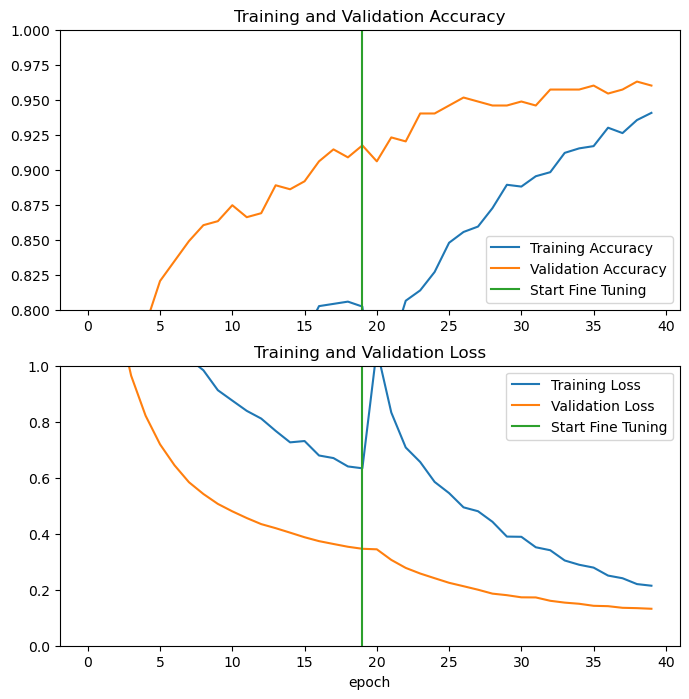

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
loss, accuracy = model.evaluate(test_dataset)

2024-08-20 19:05:49.185038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/23 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9583 - loss: 0.1434

2024-08-20 19:05:49.976303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9594 - loss: 0.1493

W0000 00:00:1724160951.592023  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.605502  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.607268  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.609899  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.611283  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.616418  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.618407  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.620485  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.622689  152480 gp

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9595 - loss: 0.1477


W0000 00:00:1724160951.998762  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160951.999809  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.000845  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.001888  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.002978  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.003967  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.004942  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.005901  152480 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160952.006839  152480 gp

In [38]:
print('Test accuracy :', accuracy)

Test accuracy : 0.961002767086029


# predicting

In [39]:
p=os.path.join(train_dir,"apple","Image_1.jpg")
img = tf.keras.utils.load_img(
    p, target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])


W0000 00:00:1724160957.187271  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.194123  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.200180  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.206159  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.213261  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.219134  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.225587  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.232124  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.239017  152478 gp

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


W0000 00:00:1724160957.823499  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.824740  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.826408  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.830286  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.848213  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.849532  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.850497  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.851528  152478 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1724160957.852621  152478 gp

In [40]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to cabbage with a 99.85 percent confidence.


In [41]:
score

<tf.Tensor: shape=(36,), dtype=float32, numpy=
array([1.60286470e-06, 3.80858819e-06, 3.63169784e-05, 5.14095473e-06,
       9.98491883e-01, 6.48609785e-07, 2.88821479e-06, 6.13537050e-05,
       8.06789956e-07, 1.22270403e-05, 1.59222818e-05, 4.81486950e-06,
       3.89574525e-05, 7.83257019e-06, 5.38179620e-07, 1.99475903e-06,
       2.74546369e-06, 2.79476753e-05, 9.12570453e-04, 4.94174947e-06,
       6.13564553e-05, 4.36133632e-06, 1.99595229e-06, 5.51305675e-06,
       2.25727808e-06, 1.88913982e-05, 7.84144561e-07, 1.52167036e-06,
       9.43243504e-06, 1.33955591e-05, 1.12640941e-04, 4.03167542e-05,
       1.35308355e-05, 3.52483937e-07, 2.99210042e-05, 4.88353144e-05],
      dtype=float32)>

In [42]:
# Retrieve a batch of images and their corresponding labels from the test dataset
image_batch, label_batch = next(iter(test_dataset))

# Predict the classes for the images in the batch
predicted_batch = model.predict(image_batch)

# Get the index of the class with the highest probability
predicted_id = tf.math.argmax(predicted_batch, axis=-1)

# Convert the predicted indices to a numpy array
predicted_id = predicted_id.numpy()

# Use the predicted indices to retrieve the class names
predicted_label_batch = [class_names[i] for i in predicted_id]

print(predicted_label_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
['apple', 'cabbage', 'cabbage', 'cucumber', 'apple', 'grapes', 'carrot', 'banana', 'cauliflower', 'cucumber', 'ginger', 'carrot', 'apple', 'jalepeno', 'carrot', 'capsicum']


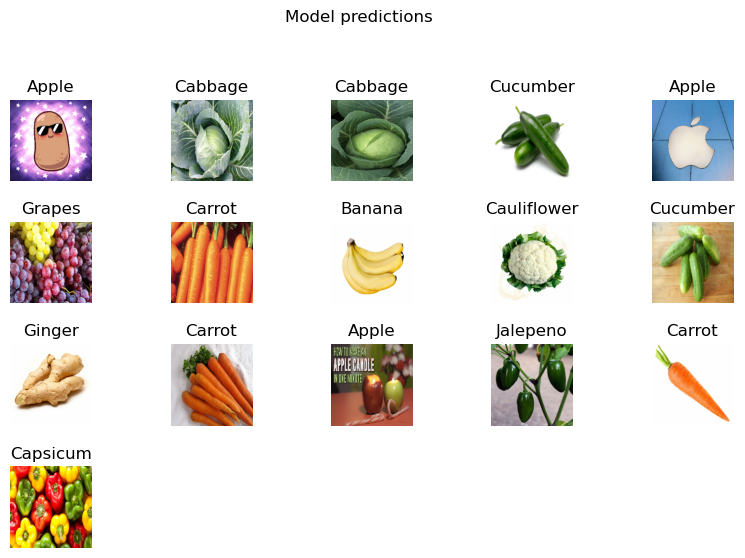

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Number of images in the batch
num_images = image_batch.shape[0]

# Determine the number of images to display (max 30 or the number of images in the batch)
num_to_display = min(30, num_images)

# Convert TensorFlow tensors to NumPy arrays
image_batch_np = image_batch.numpy()
predicted_label_batch_np = np.array(predicted_label_batch)

plt.figure(figsize=(10, 9))
plt.subplots_adjust(hspace=0.5)

for n in range(num_to_display):
    plt.subplot(6, 5, n + 1)
    plt.imshow(np.clip(image_batch_np[n], 0, 255).astype("uint8"))
    plt.title(predicted_label_batch_np[n].title())
    plt.axis('off')

plt.suptitle("Model predictions")
plt.show()


In [49]:
export_path = os.path.normpath(os.path.join(os.getcwd(),"model.keras"))
model.save(export_path)

export_path

'/mnt/d/Projects/Fruit_n_Vegetable_Detector/backend/model.keras'